In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
import joblib
import pickle
import gc


import warnings
warnings.filterwarnings("ignore")

In [2]:
# !pip install scikeras

In [3]:
!pip install scikit-learn==1.4 joblib==1.4.2 0 keras==3.2.0 tensorflow==2.15.0 scikeras==0.8.0


  Using cached scikit_learn-1.4.0-1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached 0-0.0.0-py2.py3-none-any.whl.metadata (702 bytes)
  Using cached keras-3.2.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached scikeras-0.8.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached wrapt-1.14.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install keras==3.2.0 and tensorflow==2.15.0 because these package versions have conflicting dependencies.

In [4]:
import joblib
import sklearn
import tensorflow
import scikeras
import keras
print(keras.__version__)
print(joblib.__version__)
print(sklearn.__version__)
print(tensorflow.__version__)

print(scikeras.__version__)

3.3.3
1.4.2
1.5.2
2.16.1
0.13.0


In [5]:
import sys
print(sys.version)

3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:45:18) [GCC 12.3.0]


In [6]:
# import scikeras
# print(scikeras.__version__)

In [7]:
# load cleaned data 
train= pd.read_csv("/kaggle/input/fraud-detection-cleaned-data/train_fraud_detection_cleaned_data.csv")
test= pd.read_csv("/kaggle/input/fraud-detection-cleaned-data/test_fraud_detection_cleaned_data.csv")

In [8]:
train

,TransactionID,isFraud,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,...,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T,id_12_Found,id_12_NotFound,DeviceType_desktop,DeviceType_mobile
0,2987000,0,68.50,13926,361.0,150.0,142.0,315.0,87.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2987001,0,29.00,2755,404.0,150.0,102.0,325.0,87.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,2987002,0,59.00,4663,490.0,150.0,166.0,330.0,87.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,2987003,0,50.00,18132,567.0,150.0,117.0,476.0,87.0,2.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,2987004,0,50.00,4497,514.0,150.0,102.0,420.0,87.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,49.00,6550,361.0,150.0,226.0,272.0,87.0,2.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
590536,3577536,0,39.50,10444,225.0,150.0,224.0,204.0,87.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
590537,3577537,0,30.95,12037,595.0,150.0,224.0,231.0,87.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
590538,3577538,0,117.00,7826,481.0,150.0,224.0,387.0,87.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


## Train the data

In [9]:
# Seprate the target and predictors
X = train.drop(columns = ["isFraud","TransactionID"])
y = train["isFraud"]

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(413378, 189) (413378,)
(177162, 189) (177162,)


In [10]:
test =test.drop(columns = ['TransactionID'])

In [11]:
del train
gc.collect()

30


# Standardization

In [12]:
# Standardization
scaler = StandardScaler()

#train data
X_train_scaled = scaler.fit_transform(X_train)
#validation data
X_val_scaled = scaler.transform(X_val)

# TEST
test_scaled = scaler.transform(test)

X_train_scaled.shape

(413378, 189)

In [13]:
type(scaler)

sklearn.preprocessing._data.StandardScaler

In [14]:
#save scaler 
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [15]:
# # Select the top 100 features based on ANOVA F-value between the features and the target
# select_k_best = SelectKBest(score_func=f_classif, k=100)
# X_train_selected = select_k_best.fit_transform(X_train_scaled, y_train)
# X_val_selected = select_k_best.transform(X_val_scaled)
# X_train_selected.shape

In [16]:
# scaler.feature_names_in_

In [17]:

del X_train, X_val, test

In [18]:
# check for imabalance
pd.value_counts(y_train)

isFraud
0    399056
1     14322
Name: count, dtype: int64

In [19]:
# !pip install scikit-learn

## SMOTE (Synthetic Minority Over-sampling Technique)

generates synthetic samples for the minority class (fraudulent transactions) to balance the classes.

In [20]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled,y_train)
print(X_train_smote.shape, y_train_smote.shape)


(798112, 189) (798112,)


In [21]:
# del X_train_scaled, y_train

In [22]:
pd.value_counts(y_train_smote)

isFraud
0    399056
1    399056
Name: count, dtype: int64

In [23]:
# from imblearn.under_sampling import RandomUnderSampler

# undersampler = RandomUnderSampler(random_state = 42)
# X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train_scaled,y_train)

# PCA


In [24]:
# from sklearn.decomposition  import PCA
# pca = PCA(n_components = 50)

# X_train_pca = pca.fit_transform(X_train_smote)

# X_val_pca = pca.transform(X_val_selected)


In [25]:
# class_weight = {0: 1, 1: 10}
# models = {
#     "Random Forest": RandomForestClassifier(class_weight="balanced", n_jobs=-1, random_state= 42, n_estimators=100, max_samples=0.8,max_depth=10, 
#                                             max_features='sqrt', min_samples_split=0.8, criterion = "entropy"),
#     "SVM": SVC(probability= True)
# }


# for model_name, model in models.items():
#     print(f"Training {model_name}...")
#     model.fit(X_train_pca, y_train_smote)
#     y_pred= model.predict(X_val_pca)
    
#     print(f"Evaluation report of {model_name}:")
#     print(classification_report(y_val, y_pred))
    
    


Tried with PCA. result was poor. I will skip the PCA and go with original dimension of dataset.

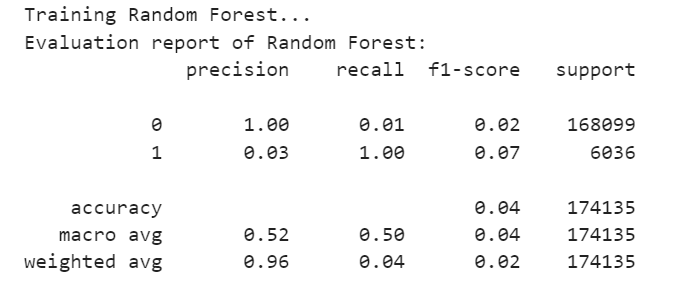

# ML Model Training
1. Random Forest Classifier
2. SVC  - Dropped the SVC model it was taking longer time.
3. XGB

Training Random Forest...
<class 'sklearn.ensemble._forest.RandomForestClassifier'>


Evaluation report of Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95    170821
           1       0.25      0.69      0.36      6341

    accuracy                           0.91    177162
   macro avg       0.62      0.81      0.66    177162
weighted avg       0.96      0.91      0.93    177162


Validation AUC of Random Forest:
0.8935524313209902
Feature Importance


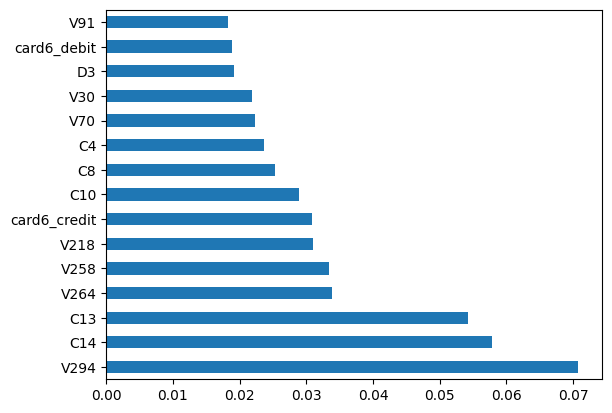

################################
Training XGBoost...
<class 'xgboost.sklearn.XGBClassifier'>


Evaluation report of XGBoost:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57    170821
           1       0.06      0.97      0.11      6341

    accuracy                           0.42    177162
   macro avg       0.53      0.69      0.34    177162
weighted avg       0.96      0.42      0.55    177162


Validation AUC of XGBoost:
0.9060823788906076
Feature Importance


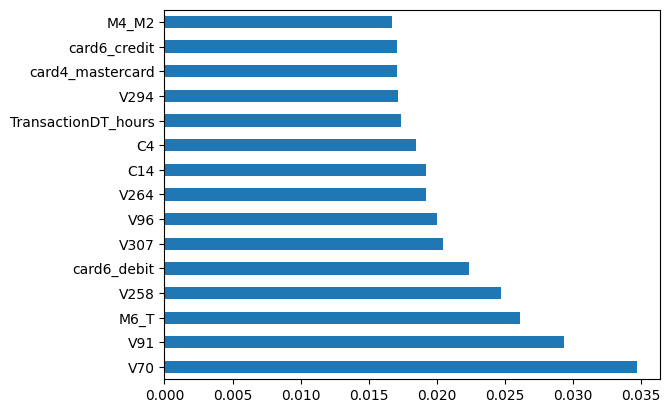

################################


In [27]:
# class_weight = {0:1, 1:99}

models = {
    "Random Forest": RandomForestClassifier(random_state= 42, n_estimators=100, max_samples=0.8,max_depth=10, 
                                            class_weight = "balanced"),
    "XGBoost": XGBClassifier(
    scale_pos_weight=99, random_state=42, n_estimators=100, learning_rate=0.1)
}



for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_smote, y_train_smote)
    print(type(model))
    joblib.dump(model, f"{model_name}.pkl")
    
    y_pred= model.predict(X_val_scaled)
    y_pred_proba = model.predict_proba(X_val_scaled)
    
    print(f"\n\nEvaluation report of {model_name}:")
    print(classification_report(y_val, y_pred))
    
    print(f"\nValidation AUC of {model_name}:")
    print(roc_auc_score(y_val, y_pred_proba[:, 1]))
    
    if model_name == "Random Forest" or model_name == "XGBoost":
        print("Feature Importance")
        pd.Series(model.feature_importances_, index= X.columns).nlargest(15).plot(kind="barh")
        plt.show()
    print("################################")
    
    

# DL Model- 
* LSTM
* AUTOENCODER



In [28]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences = True, input_shape = (X_train_scaled.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics=['accuracy'])
    return model


lstm_model = create_lstm_model()
lstm_model.fit(X_train_smote.reshape(X_train_smote.shape[0], X_train_smote.shape[1], 1), 
              y_train_smote,
              epochs=10,
             batch_size = 64)
lstm_model.save("lstm_model.h5")

Epoch 1/10
12471/12471 ━━━━━━━━━━━━━━━━━━━━ 252s 20ms/step - accuracy: 0.7306 - loss: 0.5311
Epoch 2/10
12471/12471 ━━━━━━━━━━━━━━━━━━━━ 250s 20ms/step - accuracy: 0.8229 - loss: 0.3923
Epoch 3/10
12471/12471 ━━━━━━━━━━━━━━━━━━━━ 250s 20ms/step - accuracy: 0.8535 - loss: 0.3334
Epoch 4/10
12471/12471 ━━━━━━━━━━━━━━━━━━━━ 250s 20ms/step - accuracy: 0.8754 - loss: 0.2920
Epoch 5/10
12471/12471 ━━━━━━━━━━━━━━━━━━━━ 251s 20ms/step - accuracy: 0.8903 - loss: 0.2629
Epoch 6/10
12471/12471 ━━━━━━━━━━━━━━━━━━━━ 251s 20ms/step - accuracy: 0.9005 - loss: 0.2415
Epoch 7/10
12471/12471 ━━━━━━━━━━━━━━━━━━━━ 250s 20ms/step - accuracy: 0.9086 - loss: 0.2245
Epoch 8/10
12471/12471 ━━━━━━━━━━━━━━━━━━━━ 251s 20ms/step - accuracy: 0.9145 - loss: 0.2112
Epoch 9/10
12471/12471 ━━━━━━━━━━━━━━━━━━━━ 251s 20ms/step - accuracy: 0.9186 - loss: 0.2014
Epoch 10/10
12471/12471 ━━━━━━━━━━━━━━━━━━━━ 251s 20ms/step - accuracy: 0.9221 - loss: 0.1940


In [29]:
from keras.models import Model
from keras.layers import Input


# Train autoencoder  for feature extraction

In [30]:
# input_dim = X_train_scaled.shape[1]
# input_layer = Input(shape=(input_dim,))
# encoder = Dense(63, activation='relu')(input_layer)
# encoder = Dense(32, activation='relu')(encoder)
# decoder = Dense(64, activation='relu')(encoder)
# decoder = Dense(input_dim, activation='sigmoid')(decoder)

In [31]:
# autoencoder = Model(inputs= input_layer, outputs=decoder)
# autoencoder.compile(optimizer='adam', loss='mean_squared_error')
# autoencoder.fit(X_train_scaled, X_train_scaled, epochs= 10, batch_size=64,
#                validation_data=(X_val_scaled, X_val_scaled))

# autoencoder.save("autoencoder.h5")

In [32]:
# from keras.models import Model

# # Extract the encoder part
# encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.layers[2].output)  # Adjust layer index based on the autoencoder architecture

# # Transform the training and validation data
# X_train_encoded = encoder_model.predict(X_train_scaled)
# X_val_encoded = encoder_model.predict(X_val_scaled)


In [33]:
# import numpy as np
# # Get the reconstructed output from the autoencoder
# X_val_reconstructed = autoencoder.predict(X_val_scaled)

# # Calculate the reconstruction error
# reconstruction_errors = np.mean(np.power(X_val_scaled - X_val_reconstructed, 2), axis=1)

# # Set a threshold for anomaly detection (e.g., mean + 2 * standard deviation)
# threshold = np.mean(reconstruction_errors) + 2 * np.std(reconstruction_errors)

# # Identify anomalies
# anomalies = reconstruction_errors > threshold


In [34]:
# # Display the full array of anomalies
# print(anomalies)

# # (Optional) Create a DataFrame to better visualize the anomalies
# anomalies_df = pd.DataFrame({
#     'Reconstruction Error': reconstruction_errors,
#     'Is Anomaly': anomalies
# })

# # Display the DataFrame

# print(anomalies_df)

In [35]:
# for i in range(lem(anomalies_df)):
#      if anomalies_df.loc[i, 'Is Anomaly']:
#         print(anomalies_df.loc[i])

In [36]:
# # Display all rows where 'Is Anomaly' is True
# true_anomalies = anomalies_df[anomalies_df['Is Anomaly'] == True]
# print(true_anomalies)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from scikeras.wrappers import KerasClassifier

# Stacking Models
Stacking combines multiple models to improve performance. Here I will combine Random Forest, XGBoost, and LSTM models in a stacking ensemble.

In [38]:

# Define the base models
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [39]:
lstm_model = KerasClassifier(build_fn=create_lstm_model, 
                            epochs = 5,
                            batch_size=64,
                            verbose = 1,
                            )

estimator = [
    ('rf', models['Random Forest']),
    ('xgb', models['XGBoost']),
    ('lstm', lstm_model)
]

In [40]:
# StackingClassifier with LogisticRegression as the final estimator
stacking_model = StackingClassifier(estimators=estimator, final_estimator = models['Random Forest'], cv=3)
stacking_model.fit(X_train_smote, y_train_smote)

Epoch 1/5
12471/12471 ━━━━━━━━━━━━━━━━━━━━ 250s 20ms/step - accuracy: 0.7319 - loss: 0.5290
Epoch 2/5
12471/12471 ━━━━━━━━━━━━━━━━━━━━ 249s 20ms/step - accuracy: 0.8249 - loss: 0.3866
Epoch 3/5
12471/12471 ━━━━━━━━━━━━━━━━━━━━ 246s 20ms/step - accuracy: 0.8559 - loss: 0.3280
Epoch 4/5
12471/12471 ━━━━━━━━━━━━━━━━━━━━ 245s 20ms/step - accuracy: 0.8765 - loss: 0.2885
Epoch 5/5
12471/12471 ━━━━━━━━━━━━━━━━━━━━ 247s 20ms/step - accuracy: 0.8916 - loss: 0.2572
Epoch 1/5
8314/8314 ━━━━━━━━━━━━━━━━━━━━ 167s 20ms/step - accuracy: 0.7183 - loss: 0.5496
Epoch 2/5
8314/8314 ━━━━━━━━━━━━━━━━━━━━ 166s 20ms/step - accuracy: 0.8043 - loss: 0.4225
Epoch 3/5
8314/8314 ━━━━━━━━━━━━━━━━━━━━ 166s 20ms/step - accuracy: 0.8383 - loss: 0.3645
Epoch 4/5
8314/8314 ━━━━━━━━━━━━━━━━━━━━ 166s 20ms/step - accuracy: 0.8605 - loss: 0.3209
Epoch 5/5
8314/8314 ━━━━━━━━━━━━━━━━━━━━ 167s 20ms/step - accuracy: 0.8747 - loss: 0.2925
4157/4157 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step
Epoch 1/5
8314/8314 ━━━━━━━━━━━━━━━━━━━━ 169s 

StackingClassifier(cv=3,
                   estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=10,
                                                       max_samples=0.8,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              f...
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('lstm',
                                KerasClassifier(batch_size=64, build_fn=<function create_lstm_model at 0x7a3d50354af0>, epochs=5))],
                   final_estimator=RandomForestClassifier(class_weight='balanced',
                                                          max_depth=10,
                                                          max_samples=0.8,
                                                          random_state=42))

In [41]:
type(stacking_model)

sklearn.ensemble._stacking.StackingClassifier

In [42]:
#save the stacking model
joblib.dump(stacking_model, "stacking_model.pkl")

['stacking_model.pkl']

In [43]:
# Evaluate the stacking model
y_pred = stacking_model.predict(X_val_scaled)
y_pred_proba = stacking_model.predict_proba(X_val_scaled)

print("Stacking Model Evaluation Report:")
print(classification_report(y_val, y_pred, , target_names=['Not Fraud', 'Fraud']))
print(f"Validation AUC of Stacking Model: {roc_auc_score(y_val, y_pred_proba[:, 1])}")

2769/2769 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step
2769/2769 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step
Stacking Model Evaluation Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98    170821
           1       0.43      0.59      0.50      6341

    accuracy                           0.96    177162
   macro avg       0.71      0.78      0.74    177162
weighted avg       0.96      0.96      0.96    177162

Validation AUC of Stacking Model: 0.9115394202327576


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Confusion Matrix\n", confusion_matrix(y_val, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_val, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

Confusion Matrix
 [[165926   4895]
 [  2611   3730]]

Accuracy: 0.9576


In [46]:
# Load scaler and models
scaler = joblib.load("/kaggle/working/scaler.pkl")
rf_model = joblib.load("/kaggle/working/Random Forest.pkl")
xgb_model = joblib.load("/kaggle/working/XGBoost.pkl")
stacking_model = joblib.load("/kaggle/working/stacking_model.pkl")


In [47]:
scaler

StandardScaler()

In [48]:
rf_model

RandomForestClassifier(class_weight='balanced', max_depth=10, max_samples=0.8,
                       random_state=42)

In [49]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [50]:
stacking_model

StackingClassifier(cv=3,
                   estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=10,
                                                       max_samples=0.8,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              f...
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('lstm',
                                KerasClassifier(batch_size=64, build_fn=<function create_lstm_model at 0x7a3d50354af0>, epochs=5))],
                   final_estimator=RandomForestClassifier(class_weight='balanced',
                                                          max_depth=10,
                                                          max_samples=0.8,
                                                          random_state=42))

In [ ]:
gc.collect()